In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from os import listdir
import random
import cv2
import shutil

In [ ]:
# from PIL import Image

# def divide_image(image_path):
#     original_image = Image.open(image_path)
#     width, height = original_image.size

#     sub_width = width // 3
#     sub_height = height // 3

#     sub_images = []

#     for i in range(3):
#         for j in range(3):
#             left = j * sub_width
#             upper = i * sub_height
#             right = left + sub_width
#             lower = upper + sub_height

#             sub_image = original_image.crop((left, upper, right, lower))
#          #making a few chanages to adjust to X O prediciton
#           #sub_image is rn 2 dimensionm array
#             sub_images.append(sub_image)

#     return sub_images

# def plot_sub_images(sub_images):
#     fig, axes = plt.subplots(3, 3, figsize=(9, 9))

#     for i, ax in enumerate(axes.flat):
#         ax.imshow(sub_images[i])
#         ax.axis("off")
#         ax.set_title(f"Sub-image {i}")

#     plt.show()

In [ ]:
def divide_image(image_path):
      original_image = cv2.imread(image_path,0)
        # Get image dimensions
      height, width= original_image.shape

      # Define the number of rows and columns for segmentation
      rows = 3
      cols = 3

      # Calculate the height and width of each segment
      sub_height = height // rows
      sub_width = width // cols

      # Initialize an array to store segmented images
      sub_images = []

      for i in range(rows):
          for j in range(cols):
              # Calculate the starting and ending points of each segment
              start_row = i * sub_height
              end_row = (i + 1) * sub_height
              start_col = j * sub_width
              end_col = (j + 1) * sub_width

              # Extract the segment from the original image
              segment = original_image[start_row:end_row, start_col:end_col]
              segment = (cv2.resize(segment, (14,14))).reshape((14*14))

              #print(segment.shape)
                # Append the segmented image to the array
              sub_images.append(segment)  # bascially stores 2 D array where each element is array of n*n elemnts having the grayscale value of images
      return sub_images



How to predict X and O

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
n = 14 # You can change this to the desired size
# Create a 2D array filled with zeros
array = np.zeros((n, n))
# Fill the diagonal with 1s
np.fill_diagonal(np.fliplr(array), 255)  #fills the anti diaognal
np.fill_diagonal(array,255)
print(array)
sub_array=[  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  29, 114,  11,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  86, 231,  94,   7,  11,   1,  14,
         3,   0,   0,   0,   0,   0, 118, 222, 183, 220, 155, 186, 169,
       171,  11,   0,   0,   0,   0,  48, 219,  53,  19, 193,  57, 102,
       226, 235,  59,   0,   0,   0,   0, 111, 171,   0,   0, 137,  93,
       163,  85, 114, 192,  10,   0,   0,   0, 137, 170,   0,   0,  60,
       230, 143,   0,  11, 207,  68,   0,   0,   0,  91, 199,   6,   0,
        94, 254,  92,   0,   0, 162, 106,   0,   0,   0,  20, 212, 100,
        43, 199, 224, 154,   0,   0, 161, 123,   0,   0,   0,   0,  69,
       224, 211, 135, 116, 220,  37,  57, 220,  61,   0,   0,   0,   0,
         0, 143, 232, 212, 189, 255, 215, 225, 111,   0,   0,   0,   0,
         0,   1,  11,  22,  93, 139, 114, 108,  51,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0]
array=sub_array;    # making the ideal X
eu_dist_ar=[];
array=np.array(array).reshape(n*n,-1)
eu_dist_ar_2=[];

#Making the train and test  Dataset
ones="/content/drive/MyDrive/Competition Dataset/Modified_Images/crosses"# the Superst folder containg Xs/1s
zeros="/content/drive/MyDrive/Competition Dataset/Modified_Images/zeros"  # the superset folder conaint 0s/0s
#splitting into train and test for  zeros/0s and then for ones/Xs
ztrain_directory = "/content/drive/MyDrive/Competition Dataset/Modified_Images/zeros_train"
ztest_directory = '/content/drive/MyDrive/Competition Dataset/Modified_Images/zeros_test'
otrain_directory = "/content/drive/MyDrive/Competition Dataset/Modified_Images/crosses_train"
otest_directory = '/content/drive/MyDrive/Competition Dataset/Modified_Images/crosses_test'


#Clearing the directories

for file in os.listdir(ztrain_directory):
    path=os.path.join(ztrain_directory,file)
    os.remove(path)
for file in os.listdir(ztest_directory):
    path=os.path.join(ztest_directory,file)
    os.remove(path)
for file in os.listdir(otrain_directory):
    path=os.path.join(otrain_directory,file)
    os.remove(path)
for file in os.listdir(otest_directory):
    path=os.path.join(otest_directory,file)
    os.remove(path)

#Splittin the images from superset directory to new directories

os.makedirs(ztrain_directory, exist_ok=True)
os.makedirs(ztest_directory, exist_ok=True)

split_ratio = 0.8

# List all files in the image directory
image_files = os.listdir(zeros)

# Shuffle the list of image files
random.shuffle(image_files)

# Calculate the number of images for each set
num_images = len(image_files)
num_train = int(num_images * split_ratio)
num_test = num_images - num_train

# Copy images to the training and test directories
for i, image_file in enumerate(image_files):
    source_path = os.path.join(zeros, image_file)
    if i < num_train:
        target_directory = ztrain_directory
    else:
        target_directory = ztest_directory
    target_path = os.path.join(target_directory, image_file)
    shutil.copy(source_path, target_path)

print(f"Split {num_train} images for training and {num_test} images for testing.")


#SPLITTING FOR ZEROS
os.makedirs(otrain_directory, exist_ok=True)
os.makedirs(otest_directory, exist_ok=True)

split_ratio = 0.8

# List all files in the image directory
image_files = os.listdir(zeros)

# Shuffle the list of image files
random.shuffle(image_files)

# Calculate the number of images for each set
num_images = len(image_files)
num_train = int(num_images * split_ratio)
num_test = num_images - num_train

# Copy images to the training and test directories
for i, image_file in enumerate(image_files):
    source_path = os.path.join(ones, image_file)
    if i < num_train:
        target_directory = otrain_directory
    else:
        target_directory = otest_directory
    target_path = os.path.join(target_directory, image_file)
    shutil.copy(source_path, target_path)

print(f"Split {num_train} images for training and {num_test} images for testing.")


[[255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.]
 [  0. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [  0.   0. 255.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.   0.]
 [  0.   0.   0. 255.   0.   0.   0.   0.   0.   0. 255.   0.   0.   0.]
 [  0.   0.   0.   0. 255.   0.   0.   0.   0. 255.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 255.   0.   0. 255.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 255. 255.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 255.   0.   0. 255.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 255.   0.   0.   0.   0. 255.   0.   0.   0.   0.]
 [  0.   0.   0. 255.   0.   0.   0.   0.   0.   0. 255.   0.   0.   0.]
 [  0.   0. 255.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.   0.]
 [  0. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.]
 [255.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [ ]:
#dealing with images of zeros
#zeros its the folder in which images are stored
for img in os.listdir(otrain_directory):
  temp=(Image.open("{}/{}".format(otrain_directory,img))).resize((n,n))  #extracts the image and changes its resolution to n*n
  temp=temp.convert("L")                                      #ensuring conversion to grayscale
  pix=np.array(list(temp.getdata()))
  eu_dist=np.linalg.norm(array-pix)
  eu_dist_ar.append(eu_dist)

In [ ]:
#dealing with images of zeros
#zeros its the folder in which images are stored
for img in os.listdir(ztrain_directory):
  temp=Image.open("{}/{}".format(ztrain_directory,img)).resize((n,n))
  temp=temp.convert("L")  #ensuring conversion to grayscale
  pix=np.array(list(temp.getdata()))
  eu_dist=np.linalg.norm(array-pix)    #cslculstrd the eucleidean distance between the two arrays / images
  eu_dist_ar_2.append(eu_dist)

In [ ]:
abin=min([min(eu_dist_ar),min(eu_dist_ar_2)])
bbin=min([max(eu_dist_ar),max(eu_dist_ar_2)])   #decides the range of bins in histogram plot and helps keep bins same across both lists
nbin=15

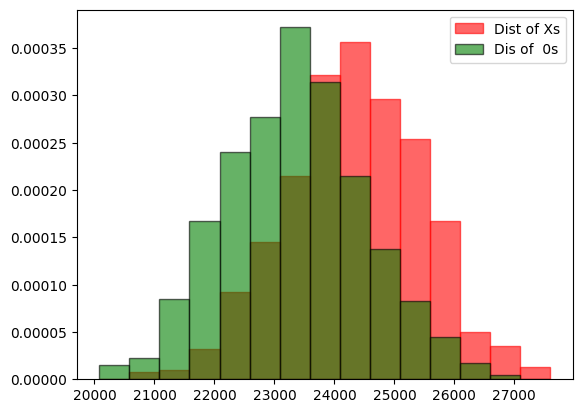

In [ ]:
eu_dist_ar=np.array(eu_dist_ar)
eu_dist_ar_2=np.array(eu_dist_ar_2)
l=plt.hist(eu_dist_ar,bins=nbin,range=(abin,bbin), density=True, alpha=0.6, color='r', edgecolor="red", label="Dist of Xs" )
m=plt.hist(eu_dist_ar_2,bins=nbin,range=(abin,bbin),density=True, alpha=0.6, color='g', edgecolor="black", label="Dis of  0s" )
#plt.hist(eu_dist_ar-eu_dist_ar_2, bins=10, desntiry=True, alpha=0.6, color = 'y', edgecolor="b
plt.legend()
plt.show()


In [ ]:
#APPLY THE FOLLOWING CODES ON  TEST DATASETS TO UNDERSTAND THE ACCURACYT
#running the model for images of X
t=0
w=0
p='X'
for img in os.listdir(otest_directory):
  temp=(Image.open("{}/{}".format(otest_directory,img))).resize((n,n))  #extracts the image and changes its resolution to n*n
  temp=temp.convert("L")                                      #ensuring conversion to grayscale
  pix=np.array(list(temp.getdata()))
  eu_dist_test=np.linalg.norm(array-pix)
  c=-1
  v=eu_dist_test
  for i in range(0,nbin):
     if (l[1][0]> v):
       c=-1
       break;
     if(l[1][nbin]<v):
       c=+200
       break;
     if((l[1][i]<v)  & (l[1][i+1]>v)):
        c=i
        break;
  if( c == -1):
    p='X'
    print("Image is an X")
  elif ( c== 200):
    p='0'
    print(" Image is a 0")
  elif ( l[0][c]> m[0][c]):
    p='X'
    print("Image is an X")
  else :
    p='0'
    print("Image is a 0");
  if(p=='X'):
    t=t+1
  else:
    w=w+1
#you cna print t and w to understand the accuracy of predictions


In [ ]:

#running the model for images of X
t=0
w=0
p='X'
for img in os.listdir(ztest_directory):
  temp=(Image.open("{}/{}".format(ztest_directory,img))).resize((n,n))  #extracts the image and changes its resolution to n*n
  temp=temp.convert("L")                                      #ensuring conversion to grayscale
  pix=np.array(list(temp.getdata()))
  eu_dist_test=np.linalg.norm(array-pix)
  c=-1
  v=eu_dist_test
  for i in range(0,nbin):
     if (l[1][0]> v):
       c=-1
       break;
     if(l[1][nbin]<v):
       c=+200
       break;
     if((l[1][i]<v)  & (l[1][i+1]>v)):
        c=i
        break;
  if( c == -1):
    p='X'
    print("Image is an X")
  elif ( c== 200):
    p='0'
    print(" Image is a 0")
  elif ( l[0][c]> m[0][c]):
    p='X'
    print("Image is an X")
  else :
    p='0'
    print("Image is a 0");
  if(p=='0'):
    t=t+1
  else:
    w=w+1
#you cna print t and w to understand the accuracy of predictions

Actual function to predict X and 0


In [ ]:
def sit_predictor(segmented_images):
  predict_img=[]
  for img in segmented_images :
    eu_dist_test=np.linalg.norm(array-img)
       #euclidean distance between ideal X and given image
    v=eu_dist_test
    print(v)
    if(np.linalg.norm(img)<=abin):
      predict_img.append(2);
    else :
      for i in range(0,nbin):
        if (l[1][0]> v):
           c=-1
           break;
        if(l[1][nbin]<v):
            c=+200
            break;
        if((l[1][i]<v)  & (l[1][i+1]>v)):
           c=i
           break;
      if( c == -1):
        # p='X'
        # print("Image is an X")
        predict_img.append(0)
      elif ( c== 200):
        # p='0'
        # print(" Image is a 0")
        predict_img.append(1)
      elif ( l[0][c]> m[0][c]):
        # p='X'
        # print("Image is an X")
        predict_img.append(0)
      else :
        #  p='0'
        #   print("Image is a 0");
        predict_img.append(1)
      # if(p=='0'):
      #   t=t+1
      # else:
      #   w=w+1
  return predict_img

In [ ]:
def evaluate(board):  # for checking if X/O has already won
    for row in board:
        if all(cell == 1 for cell in row):
            return -1
        elif all(cell == 0 for cell in row):
            return 1

    for col in board.T:
        if all(cell == 1 for cell in col):
            return -1
        elif all(cell == 0 for cell in col):
            return 1

    if all(board[i, i] == 1 for i in range(3)) or all(board[i, 2 - i] == 1 for i in range(3)):
        return -1
    elif all(board[i, i] == 0 for i in range(3)) or all(board[i, 2 - i] == 0 for i in range(3)):
        return 1

    return 0

def is_board_full(board):   # for checking if there are blank spaces to play
    return not any(cell == 2 for row in board for cell in row)

def minimax(board, depth, is_maximizing):    # the main algorithm
    score = evaluate(board)

    if score != 0:
        return score

    if is_board_full(board):
        return 0

    if is_maximizing:
        max_eval = float('-inf')
        for i in range(3):
            for j in range(3):
                if board[i, j] == 2:
                    board[i, j] = 1
                    eval = minimax(board, depth + 1, False)
                    board[i, j] = 2
                    max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i, j] == 2:
                    board[i, j] = 0
                    eval = minimax(board, depth + 1, True)
                    board[i, j] = 2
                    min_eval = min(min_eval, eval)
        return min_eval

def find_best_move(board):    # for finding next move based on given board state
    best_val = float('-inf')
    best_move = (-1, -1)
    if(not is_board_full(board)):
      if(not evaluate(board)):
        for i in range(3):
            for j in range(3):
                if board[i, j] == 2:
                    board[i, j] = 1
                    move_val = minimax(board, 0, False)
                    board[i, j] = 2
                    if move_val > best_val:
                        best_move = (i, j)
                        best_val = move_val

        return best_move
      else:
        return None   #return None if match is already won by X or O
    else:
      return None     # return None if board is full


In [ ]:
image_path = "/content/WhatsApp Image 2023-12-16 at 11.37.48.jpeg"
sub_images = divide_image(image_path)
#gr = [np.array(image.convert("L").resize((28,28))) for image in sub_images]
#sy = np.stack(gr, axis=0)
#sy = sy.reshape(sy.shape[0],28,28,1)
#y_pred_arr = np.argmax(model.predict(sy),axis=1)
#board = y_pred_arr.reshape(3,3)
#next_move = find_best_move(board)
predicted_array=sit_predictor(sub_images)
predicted_array=np.array(predicted_array).reshape(3,3)

print(find_best_move(predicted_array))

(196,)
(196,)
(196,)
(196,)
(196,)
(196,)
(196,)
(196,)
(196,)
20558.113337560917
16717.11159261671
19256.473041551508
22303.318811333887
22070.053103696875
22273.06525828899
22079.247858566196
23023.69262303508
22110.685425829746
(1, 1)


In [ ]:
predicted_array

array([[1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [ ]:
eu_dist_ar.shape

In [ ]:
sub_images

[array([ 27,  29,  29,  29,  29,  29,  29,  29,  29,  29,  29,  29,  29,
         29,  30,  30,  30,  30,  30,  30,  30,  30,  30,  29,  35,  30,
         30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  28, 122, 104,
         31,  30,  30,  30,  30,  30,  30,  30,  30,  30,  52, 199, 213,
        167,  30,  30,  30,  30,  30,  30,  30,  30,  31,  39, 202, 210,
        139, 183,  32,  30,  30,  28,  30,  30,  30,  30,  31, 213, 182,
         30,  86, 213,  70,  30,  30,  30,  30,  30,  35,  43, 211, 190,
        174, 196, 201, 207, 202, 195,  30,  30,  30,  29, 193, 196, 214,
        213, 201, 162, 213, 188, 115,  60,  30,  30,  30,  30, 172, 214,
         30,  30,  30,  45, 213,  79,  31,  30,  30,  29,  30,  31, 214,
         85,  30,  29,  60, 214, 202,  30,  30,  30,  30,  27,  30,  30,
        135, 162, 199, 200, 214, 153,  28,  30,  30,  30,  30,  30,  30,
         30,  32, 195, 213, 102,  26,  28,  30,  30,  30,  30,  30,  30,
         30,  30,  30,  30,  30,  30,  30,  30,  30

In [ ]:
l[0]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

In [ ]:
m


(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan]),
 array([ 600.        ,  706.66666667,  813.33333333,  920.        ,
        1026.66666667, 1133.33333333, 1240.        , 1346.66666667,
        1453.33333333, 1560.        , 1666.66666667, 1773.33333333,
        1880.        , 1986.66666667, 2093.33333333, 2200.        ]),
 <BarContainer object of 15 artists>)